In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2023-03-11 18:56:47.241159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

#this is a 2-dimentional array, we don't need the second dimension (inner square brackets)

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#flattering an array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(x, y, index):
    plt.figure(figsize = (1,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

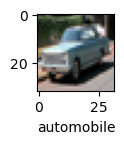

In [9]:
plot_sample(x_train, y_train, 32)

## Normalizing data

As we have colored images in rgb format, we have to divide each value (r, g and b ) by 255 and get them in range [0,1]

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train = x_train/255
x_test = x_test/255

## Building a simple artifisial neural network (ANN)

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)), 
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

2023-03-11 19:00:34.577836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.8128 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6248 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5443 - accuracy: 0.4534
Epoch 4/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4840 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4335 - accuracy: 0.4936


In [13]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4714 - accuracy: 0.4734


[1.4713915586471558, 0.4733999967575073]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [16]:
y_pred_ann = ann.predict(x_test)
y_pred_ann_classes = [np.argmax(element) for element in y_pred_ann]

313/313 [==============================] - 6s 20ms/step


In [18]:
print(f'Classification report: \n{classification_report(y_test, y_pred_ann_classes)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.69      0.50      0.58      1000
           2       0.29      0.61      0.39      1000
           3       0.44      0.14      0.21      1000
           4       0.47      0.24      0.32      1000
           5       0.38      0.43      0.41      1000
           6       0.51      0.53      0.52      1000
           7       0.51      0.60      0.55      1000
           8       0.53      0.69      0.60      1000
           9       0.63      0.50      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



## Building a convolutinal neural network (CNN)

In [19]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters = 32, 
                  kernel_size = (3,3), 
                  activation = 'relu', 
                  input_shape = (32,32,3)), #convolutional layer detects features on images (like eyes, eares, tires, ets)
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters = 64,  
                  kernel_size = (3,3),
                  activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(), 
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [20]:
cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4601 - accuracy: 0.4733
Epoch 2/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1198 - accuracy: 0.6069
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9940 - accuracy: 0.6550
Epoch 4/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9111 - accuracy: 0.6834
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8478 - accuracy: 0.7042


In [22]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9402 - accuracy: 0.6779


[0.9402379989624023, 0.6779000163078308]

In [23]:
y_test_cnn = y_test.reshape(-1,)

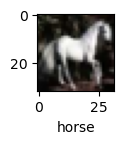

In [24]:
plot_sample(x_test, y_test_cnn, 13)

In [25]:
y_pred_cnn = cnn.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [26]:
y_pred_cnn[0]
#now we have prob. of each class to be  true, but we need to show only one with the highest prob. as a prediction

array([5.9347488e-03, 2.5094740e-04, 1.1728636e-02, 5.4649234e-01,
       8.2663866e-03, 1.6852757e-01, 2.3810884e-02, 7.7933021e-04,
       2.1865886e-01, 1.5550318e-02], dtype=float32)

In [27]:
np.argmax(y_pred_cnn[0])

3

In [28]:
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_cnn]

In [29]:
y_pred_cnn_classes[1:9]

[8, 8, 8, 4, 6, 1, 2, 3]

In [30]:
y_test_cnn[1:9]

array([8, 8, 0, 6, 6, 1, 6, 3], dtype=uint8)

In [31]:
print(f'Classification report: \n{classification_report(y_test_cnn, y_pred_cnn_classes)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.87      0.71      0.78      1000
           2       0.61      0.51      0.56      1000
           3       0.56      0.40      0.47      1000
           4       0.55      0.72      0.62      1000
           5       0.66      0.53      0.59      1000
           6       0.75      0.77      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.69      0.84      0.76      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

